In [32]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

#### Функции

In [33]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад')
    ax[0].grid(True)

    ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

#### Исходные данные

In [34]:
# Исходные данные

# Коэффициенты прямых связей
b = [1., 42., 861., 11480., 111930., 850668., 5245786., 26978328., 118030185., 445891810.,
         4280561376., 11058116888., 25518731280., 52860229080., 98672427616., 166509721602., 254661927156., 353697121050., 446775310800., 513791607420., 
         538257874440., 513791607420., 446775310800., 353697121050., 254661927156., 166509721602., 98672427616., 52860229080., 25518731280., 11058116888.,
         4280561376., 1471442973., 445891810., 118030185., 26978328., 5245786., 850668., 111930., 11480., 861.,
         42., 1.]

# Коэффициенты обратных связей
a = [1., 28.564472, 374.643346, 2971.545067, 15757.394255, 57994.369857, 147065.600832, 236961.733887, 157498.920874, -241359.648883, -686264.848217,
         -457785.358215, 576981.040839, 1126714.235668, 74660.052315, -1207023.812941, -594721.019857, 900161.022022, 688961.197236, -574934.231254, -499335.576344,
         359015.254939, 251604.140937, -216133.018013, -75411.146432, 108399.702958, -2039.354539, -36544.744896, 13925.582477, 4607.873351, -5473.240326,
         1521.823091, 325.945847, -434.297544, 188.971371, -51.705055, 9.918839, -1.368413, 0.134204, -0.008935, 0.000364, -0.000007]

# Коэффициенты обратных связей с инвертированным знаком
# for i in range(len(a)):
#     a[i] = -a[i]

#### Импульсная характеристика фильтра

Результаты расчета: 
1.0 13.4355 102.5779 544.8405 2255.1239 7612.6084 21839.8012 54198.0624 119259.8591 233907.1629 2809536913.0015 -73462751559.0267 1060488170419.278 -11089749657605.984 93549748718616.62 -674036022755015.0 4296302757040908.0 -2.480411193239115e+16 1.3191093033884222e+17 -6.543605566772429e+17 3.0572741841864376e+18 -1.3556812770050834e+19 5.740827905408251e+19 -2.3334396189659287e+20 9.142617605440505e+20 -3.4654446621364595e+21 1.2746734602666925e+22 -4.561910878142359e+22 1.5922541109174777e+23 -5.431080452464794e+23


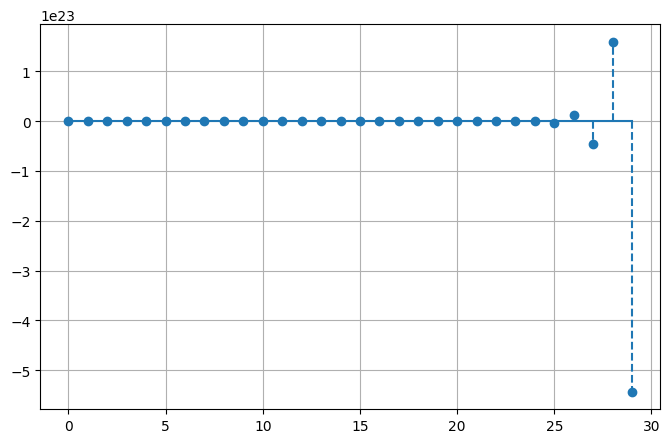

In [35]:
# Импульсная характеристика фильтра

# Входной сигнал
# x = [1.] + 30*[0.]
x = [1., *np.zeros(shape=29)]

# Отклик фильтра на воздействие единичного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.lfilter(a=a, b=b, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

Результаты расчета: 
1.0 13.4355 102.5779 544.8405 2255.1239 7612.6084 21839.8012 54198.0624 119259.8591 233907.1629 2809536913.0013 -73462751559.0259 1060488170419.2773 -11089749657605.969 93549748718616.62 -674036022755016.0 4296302757040924.5 -2.4804111932391104e+16 1.3191093033883866e+17 -6.543605566771804e+17 3.05727418418568e+18 -1.3556812770043658e+19 5.740827905402654e+19 -2.3334396189623006e+20 9.142617605420776e+20 -3.465444662127381e+21 1.2746734602630124e+22 -4.5619108781273934e+22 1.5922541109097722e+23 -5.4310804524119505e+23


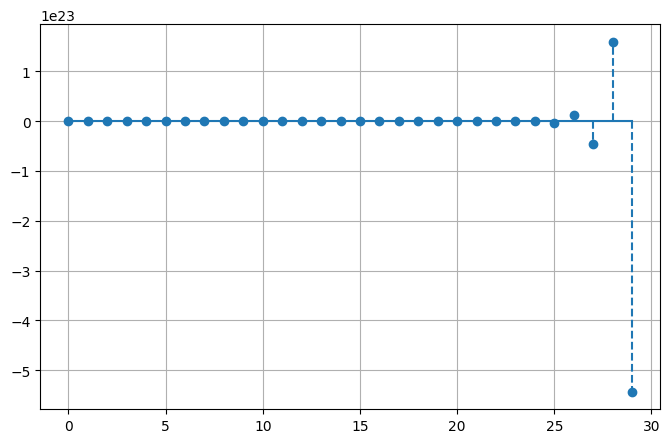

In [36]:
# Импульсная характеристика фильтра

# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# 1 - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
t, y = sp.dimpulse(system=(b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Переходная характеристика фильтра

Результаты расчета: 
1.0 14.4355 117.0134 661.8539 2916.9778 10529.5862 32369.3874 86567.4499 205827.3089 439734.4719 2809976647.4733 -70652774911.5534 989835395507.7253 -10099914262098.266 83449834456518.4 -590586188298496.5 3705716568742396.5 -2.10983953636484e+16 1.1081253497518829e+17 -5.4354802170198784e+17 2.5137261624837755e+18 -1.1043086607561073e+19 4.6365192446473535e+19 -1.8697876944976924e+20 7.272829910919236e+20 -2.738161671029817e+21 1.0008572931551498e+22 -3.5610535849407076e+22 1.2361487523998702e+23 -4.194931699954939e+23


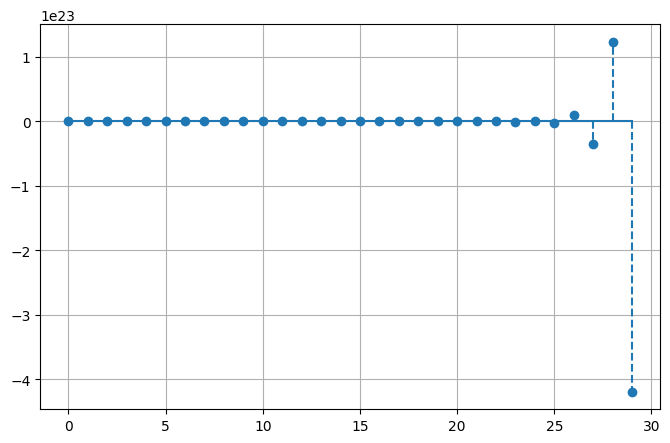

In [37]:
# Переходная характеристика фильтра

# Входной сигнал
x = np.ones(shape=30)

# Отклик фильтра на воздействие входного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.lfilter(a=a, b=b, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

Результаты расчета: 
1.0 14.4355 117.0134 661.8539 2916.9778 10529.5862 32369.3874 86567.4499 205827.3089 439734.4719 2809976647.4733 -70652774911.5527 989835395507.7266 -10099914262098.266 83449834456518.38 -590586188298498.0 3705716568742441.0 -2.1098395363649024e+16 1.1081253497519386e+17 -5.4354802170201965e+17 2.5137261624838615e+18 -1.1043086607560819e+19 4.636519244647095e+19 -1.8697876944978995e+20 7.272829910925527e+20 -2.7381616710379247e+21 1.0008572931628908e+22 -3.5610535850027262e+22 1.2361487524437553e+23 -4.1949317002366595e+23


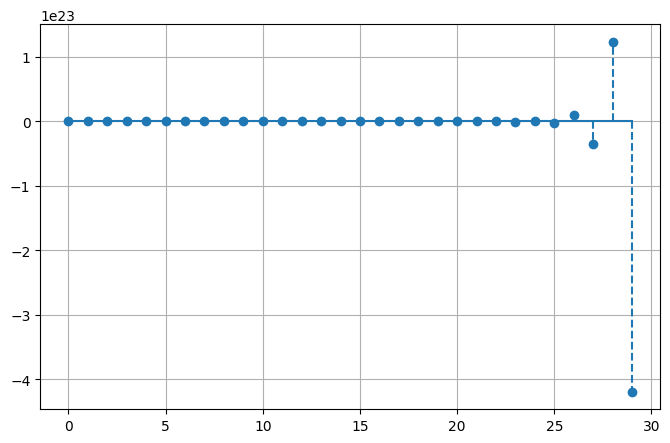

In [38]:
# Переходная характеристика фильтра

# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# 1 - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
t, y = sp.dstep((b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(*y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Расчет нулей и полюсов

In [39]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

Нули: [-11.91163605+2.81785133j -11.91163605-2.81785133j
  -8.77178918+7.41690366j  -8.77178918-7.41690366j
  -3.73546957+9.30220322j  -3.73546957-9.30220322j
   1.1517313 +7.82880059j   1.1517313 -7.82880059j
   3.63010776+3.56183923j   3.63010776-3.56183923j
   0.92421424+1.21372462j   0.92421424-1.21372462j
   0.40431084+0.97142936j   0.40431084-0.97142936j
   0.15693941+0.80427133j   0.15693941-0.80427133j
   0.01214528+0.677521j     0.01214528-0.677521j
  -0.08174749+0.57627261j  -0.08174749-0.57627261j
  -0.14655287+0.49233268j  -0.14655287-0.49233268j
  -0.193171  +0.42068551j  -0.193171  -0.42068551j
  -0.22765693+0.35804213j  -0.22765693-0.35804213j
  -0.25362899+0.30213179j  -0.25362899-0.30213179j
  -0.27336614+0.25131906j  -0.27336614-0.25131906j
  -0.28835753+0.20438077j  -0.28835753-0.20438077j
  -0.29960279+0.16036765j  -0.29960279-0.16036765j
  -0.30777647+0.11852212j  -0.30777647-0.11852212j
  -0.3133294 +0.07820172j  -0.3133294 -0.07820172j
  -0.31761174+0.j          

#### Диаграмма нулей и полюсов

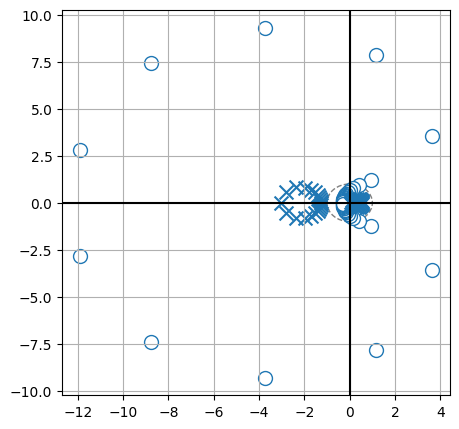

In [40]:
ZerosPolesDiagram(z=z, p=p)

#### Амплитудно-частотная и фазо-частотная характеристики фильтра

In [41]:
# Определяем АЧХ и ФЧХ фильтра

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# worN - количество вычисляемых откликов
# whole - False: вычисляется отклик на частоты от 0 до Пи, True: вычисляется отклик на частоты от 0 до 2Пи
# include_nyquist - вычислять отклик для конечной частоты (в данном случае для 2Пи), который по умолчанию не вычисляется
w, h = sp.freqz(b=b, a=a, worN=512, whole=True, include_nyquist=True)

In [42]:
# Пример расчета модуля отклика фильтра
print(np.sqrt(h[5].real**2 + h[5].imag**2), abs(h[5]))

32867480.960126802 32867480.960126802


In [43]:
# Пример расчета аргумента отклика фильтра
print(np.arctan(h[5].imag/h[5].real), np.angle(h[5]))

-1.1045585112627523 -1.1045585112627523


In [44]:
# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

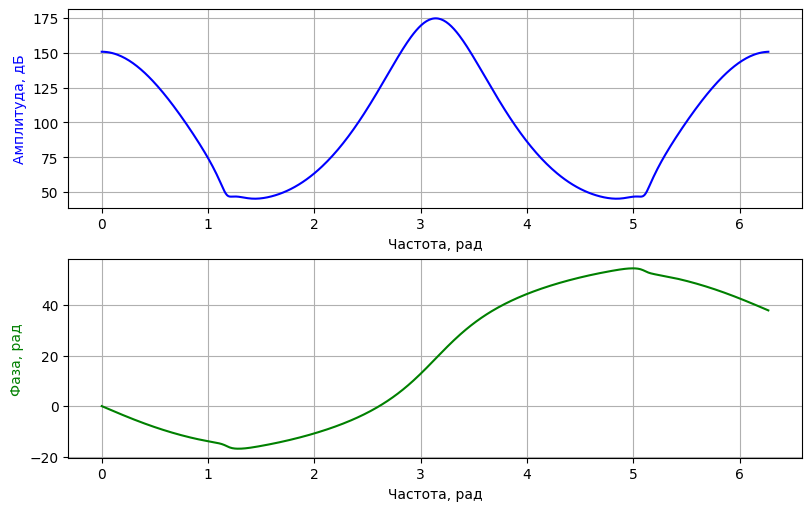

In [45]:
# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr)